This is an exmaple for using Tensorboard to loading/modifying/transforming images.<br>

Tensorboard is using for image transformation/data visualization. <br>
'conda install tensorboard'

In [57]:
from torch.utils.tensorboard import SummaryWriter
from torchvision import transforms
from PIL import Image
from IPython.display import display
import numpy as np
import cv2
import os

Load the image file<br>
"pip install opencv-python"

In [3]:
image_path = "data/train/ants_image/0013035.jpg"
img = Image.open(image_path)
print(type(img))             # check the type of image file;  It is PIL format, we need to transfor it.
# writer.add_image() only accepts img_tensor (torch.Tensor, numpy.array, or string/blobname)

<class 'PIL.JpegImagePlugin.JpegImageFile'>


Transform the image to numpy array

In [8]:
img_array = np.array(img)
print(type(img_array))
print(img_array.shape)   # =(512, 768, 3) where is (Height, Width, Channel),  Channel = RGB color

<class 'numpy.ndarray'>
(512, 768, 3)


Or we can transfor the image to Tensor form

In [19]:
tensor_trans = transforms.ToTensor()
tensor_img = tensor_trans(img)
print(type(tensor_img))

<class 'torch.Tensor'>


Or we can directly read the image file as a np.array

In [17]:
cv_img = cv2.imread(image_path)
print(type(cv_img))

<class 'numpy.ndarray'>


Rename the image files then we can easier to read all of them

In [49]:
import os
path='data/val/bees'     

#print(path)

#获取该目录下所有文件，存入列表中
fileList=os.listdir(path)

#print(fileList)

for i in range(1,len(fileList)+1):
    
    #设置旧文件名（就是路径+文件名）
    oldname=path + os.sep + fileList[i-1]   # os.sep添加系统分隔符
    
    #设置新文件名
    newname=path + os.sep +'a'+str(i)+'.jpg'
    
    os.rename(oldname,newname)   #用os模块中的rename方法对文件改名
    print(oldname,'======>',newname)


data/val/bees\b1.jpg ======> data/val/bees\a1.jpg
data/val/bees\b10.jpg ======> data/val/bees\a2.jpg
data/val/bees\b11.jpg ======> data/val/bees\a3.jpg
data/val/bees\b12.jpg ======> data/val/bees\a4.jpg
data/val/bees\b13.jpg ======> data/val/bees\a5.jpg
data/val/bees\b14.jpg ======> data/val/bees\a6.jpg
data/val/bees\b15.jpg ======> data/val/bees\a7.jpg
data/val/bees\b16.jpg ======> data/val/bees\a8.jpg
data/val/bees\b17.jpg ======> data/val/bees\a9.jpg
data/val/bees\b18.jpg ======> data/val/bees\a10.jpg
data/val/bees\b19.jpg ======> data/val/bees\a11.jpg
data/val/bees\b2.jpg ======> data/val/bees\a12.jpg
data/val/bees\b20.jpg ======> data/val/bees\a13.jpg
data/val/bees\b21.jpg ======> data/val/bees\a14.jpg
data/val/bees\b22.jpg ======> data/val/bees\a15.jpg
data/val/bees\b23.jpg ======> data/val/bees\a16.jpg
data/val/bees\b24.jpg ======> data/val/bees\a17.jpg
data/val/bees\b25.jpg ======> data/val/bees\a18.jpg
data/val/bees\b26.jpg ======> data/val/bees\a19.jpg
data/val/bees\b27.jpg =

Use SummaryWriter<br>
Run "tensorboard --logdir=logs" in Terminal to see the result

In [51]:
path='data/val/bees'     
fileList=os.listdir(path)

writer = SummaryWriter('logs')


for i in range(1,len(fileList)+1):
    image_path = "data/val/bees/a"+ str(i) +".jpg"
    img = Image.open(image_path)
    img_array = np.array(img)
    writer.add_image("test", img_array, i, dataformats='HWC')   # (name, y-axis, x-axis)
                                      # type "tensorboard --logdir=logs" to see the result

writer.close()

Using Normalization to normalize colors

tensor(0.3137)
tensor(-0.3725)


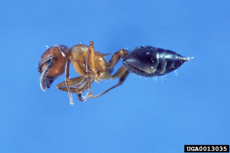

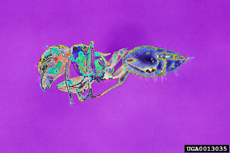

In [66]:
print(tensor_img[0][0][0])  ## RGB at down-left coner
trans_norm = transforms.Normalize([0.5, 0.5, 0.5],[0.5, 0.5, 0.5])  
img_norm = trans_norm(tensor_img)
print(img_norm[0][0][0])    ## RGB at down-left coner after transform
trans_PIL = transforms.ToPILImage()
display(trans_PIL(tensor_img).resize(( int(trans_PIL(tensor_img).width * 0.3), int(trans_PIL(tensor_img).height * 0.3))))   ## compare two images, also resize them
display(trans_PIL(img_norm).resize(( int(trans_PIL(img_norm).width * 0.3), int(trans_PIL(img_norm).height * 0.3))))